# Stock Price Prediction — Data Exploration
This notebook explores the `Data.csv` (independent variable) and `StockPrice.csv` (dependent variable) datasets to understand structure, trends, and the relationship between changes in Data and stock price movements.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings("ignore")

# Visualization settings
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_theme(style="darkgrid")
sns.set_palette("husl")

%matplotlib inline

## 1. Load and Inspect Datasets

In [23]:
# Load datasets (notebook is in: project/notebooks/)
# and CSV files are in: project/data/
data_df = pd.read_csv("../data/Data.csv")
stock_df = pd.read_csv("../data/StockPrice.csv")

print("Data.csv Shape:", data_df.shape)
print("StockPrice.csv Shape:", stock_df.shape)

print("\nData.csv columns:", data_df.columns.tolist())
print("StockPrice.csv columns:", stock_df.columns.tolist())

Data.csv Shape: (3902, 2)
StockPrice.csv Shape: (3839, 2)

Data.csv columns: ['Date', 'Data']
StockPrice.csv columns: ['Date', 'Price']


In [24]:
print("=== Data.csv - First 10 rows ===")
display(data_df.head(10))

print("\n=== StockPrice.csv - First 10 rows ===")
display(stock_df.head(10))

=== Data.csv - First 10 rows ===


,Date,Data
0,2025-03-26,2.369
1,2025-03-25,2.365
2,2025-03-24,2.367
3,2025-03-21,2.386
4,2025-03-20,2.387
5,2025-03-19,2.411
6,2025-03-18,2.426
7,2025-03-17,2.456
8,2025-03-14,2.478
9,2025-03-13,2.501



=== StockPrice.csv - First 10 rows ===


,Date,Price
0,2025-03-26,5759.50
1,2025-03-25,5826.50
2,2025-03-24,5815.50
3,2025-03-21,5718.25
4,2025-03-20,5712.75
5,2025-03-19,5728.75
6,2025-03-18,5668.25
7,2025-03-17,5730.50
8,2025-03-14,5690.25
9,2025-03-13,5577.75


In [25]:
print("=== Data.csv Info ===")
data_df.info()

print("\n=== StockPrice.csv Info ===")
stock_df.info()

=== Data.csv Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3902 entries, 0 to 3901
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3902 non-null   object 
 1   Data    3902 non-null   float64
dtypes: float64(1), object(1)
memory usage: 61.1+ KB

=== StockPrice.csv Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3839 entries, 0 to 3838
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3839 non-null   object 
 1   Price   3839 non-null   float64
dtypes: float64(1), object(1)
memory usage: 60.1+ KB


#### Data.csv Info

- This file is a **table with 3,902 rows** (records).
- Rows are numbered from **0 to 3901**.
- It has **2 columns**:
  - **Date**: stored as text (object), and **no missing values**.
  - **Data**: numeric values with decimals (float), and **no missing values**.
- The data uses about **61 KB of memory**.
- All rows are complete (nothing is empty).

---

#### StockPrice.csv Info

- This file is a **table with 3,839 rows**.
- Rows are numbered from **0 to 3838**.
- It has **2 columns**:
  - **Date**: stored as text (object), and **no missing values**.
  - **Price**: numeric values with decimals (float), and **no missing values**.
- The data uses about **60 KB of memory**.
- All rows are complete (nothing is empty).

## 2. Data Quality Check

In [26]:
print("=== Missing Values ===")
print("Data.csv missing values:")
print(data_df.isnull().sum())

print("\nStockPrice.csv missing values:")
print(stock_df.isnull().sum())

print("\n=== Duplicate Rows ===")
print(f"Data.csv duplicates: {data_df.duplicated().sum()}")
print(f"StockPrice.csv duplicates: {stock_df.duplicated().sum()}")

=== Missing Values ===
Data.csv missing values:
Date    0
Data    0
dtype: int64

StockPrice.csv missing values:
Date     0
Price    0
dtype: int64

=== Duplicate Rows ===
Data.csv duplicates: 0
StockPrice.csv duplicates: 0


#### Missing Values

 Data.csv
- **Date**: 0 missing values  
- **Data**: 0 missing values  
➡️ This means **every row has complete data**.

 StockPrice.csv
- **Date**: 0 missing values  
- **Price**: 0 missing values  
➡️ This means **there are no empty cells** in this file.

---

Duplicate Rows

- **Data.csv**: 0 duplicate rows  
- **StockPrice.csv**: 0 duplicate rows  

➡️ This means **all rows are unique**, and no data is repeated.


In [27]:
# Convert Date columns to datetime
data_df["Date"] = pd.to_datetime(data_df["Date"])
stock_df["Date"] = pd.to_datetime(stock_df["Date"])

# Sort chronologically (IMPORTANT for time-series)
data_df = data_df.sort_values("Date").reset_index(drop=True)
stock_df = stock_df.sort_values("Date").reset_index(drop=True)

print("Date ranges:")
print(f"Data.csv: {data_df['Date'].min()} to {data_df['Date'].max()}")
print(f"StockPrice.csv: {stock_df['Date'].min()} to {stock_df['Date'].max()}")

Date ranges:
Data.csv: 2010-01-04 00:00:00 to 2025-03-26 00:00:00
StockPrice.csv: 2010-01-04 00:00:00 to 2025-03-26 00:00:00


## 3. Statistical Summary

In [28]:
print("=== Data.csv Statistics ===")
display(data_df.describe())

print("\n=== StockPrice.csv Statistics ===")
display(stock_df.describe())

=== Data.csv Statistics ===


,Date,Data
count,3902,3902.000000
mean,2017-08-13 04:38:15.438236928,0.583423
min,2010-01-04 00:00:00,-0.605000
25%,2013-10-18 18:00:00,-0.328000
50%,2017-08-12 12:00:00,0.080500
75%,2021-06-08 18:00:00,1.014750
max,2025-03-26 00:00:00,4.002000
std,NaN,1.317216



=== StockPrice.csv Statistics ===


,Date,Price
count,3839,3839.000000
mean,2017-08-11 08:17:45.277415936,2997.357020
min,2010-01-04 00:00:00,1072.500000
25%,2013-10-19 12:00:00,1939.375000
50%,2017-08-10 00:00:00,2754.500000
75%,2021-06-02 12:00:00,4217.000000
max,2025-03-26 00:00:00,6163.000000
std,NaN,1343.596346


## 4. Merge Datasets

In [29]:
# Inner join on Date to keep only dates present in BOTH datasets
merged_df = pd.merge(data_df, stock_df, on="Date", how="inner")

print(f"Merged dataset shape: {merged_df.shape}")

print("\nRows lost in merge:")
print(f"  Data.csv: {len(data_df) - len(merged_df)}")
print(f"  StockPrice.csv: {len(stock_df) - len(merged_df)}")

display(merged_df.head(10))

Merged dataset shape: (3802, 3)

Rows lost in merge:
  Data.csv: 100
  StockPrice.csv: 37


,Date,Data,Price
0,2010-01-04,0.700,1178.00
1,2010-01-05,0.699,1181.50
2,2010-01-06,0.694,1182.25
3,2010-01-07,0.692,1186.75
4,2010-01-08,0.691,1190.75
5,2010-01-11,0.689,1191.75
6,2010-01-12,0.685,1183.25
7,2010-01-13,0.684,1190.75
8,2010-01-14,0.682,1194.50
9,2010-01-15,0.680,1181.50


## 5. Time Series Visualization

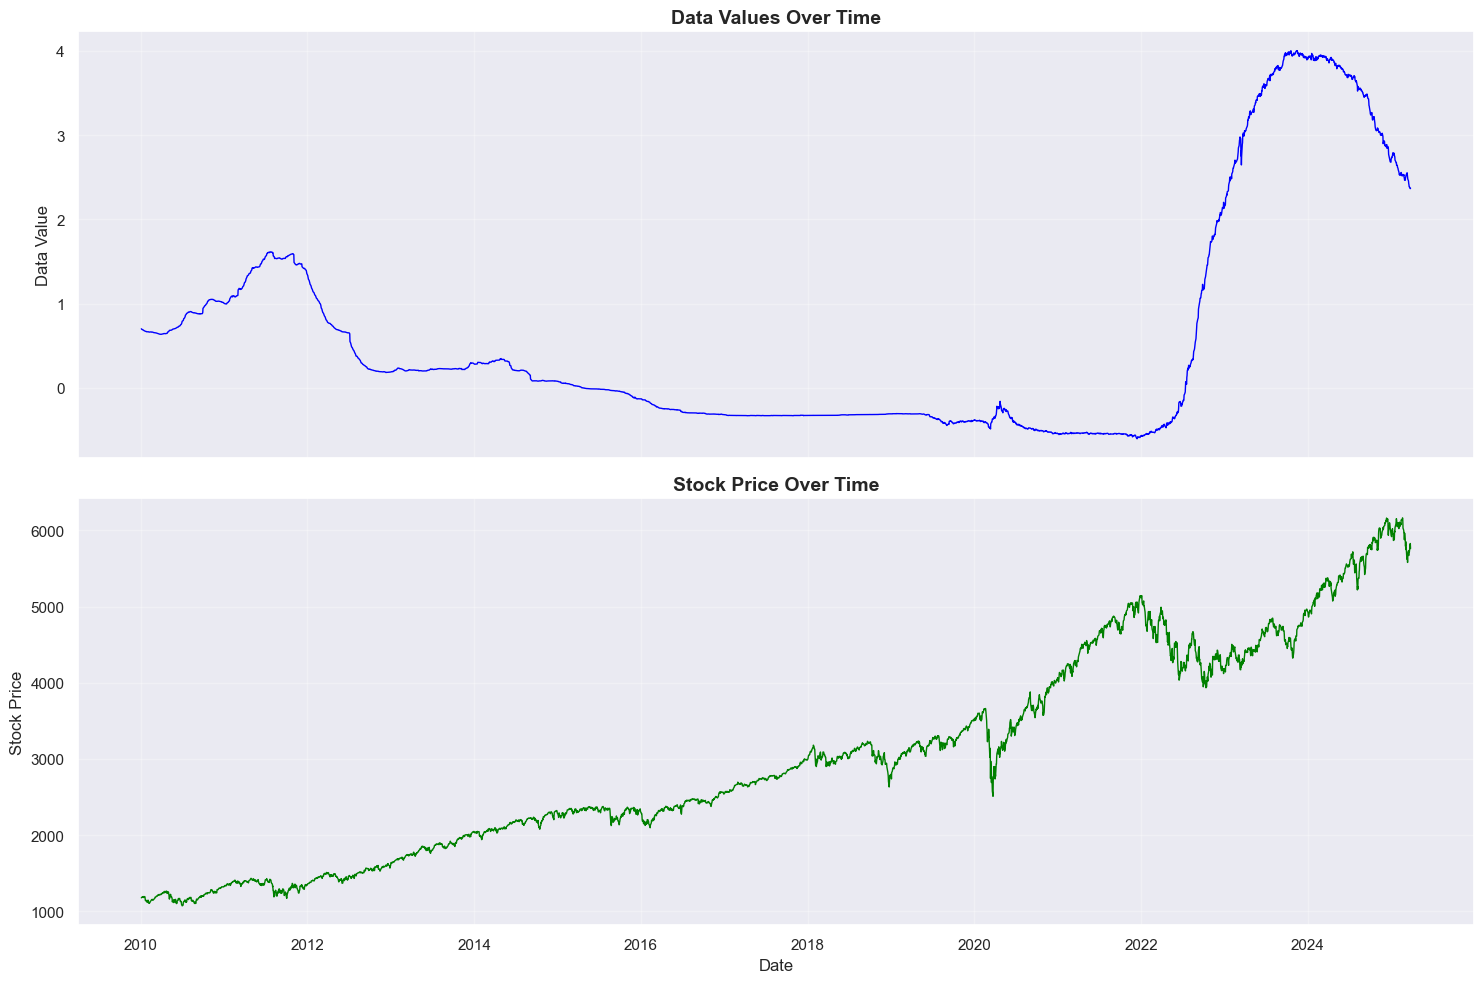

In [30]:
# Plot both time series side-by-side (2 rows, 1 column)
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot Data over time
axes[0].plot(merged_df["Date"], merged_df["Data"], color="blue", linewidth=1)
axes[0].set_title("Data Values Over Time", fontsize=14, fontweight="bold")
axes[0].set_ylabel("Data Value")
axes[0].grid(True, alpha=0.3)

# Plot Stock Price over time
axes[1].plot(merged_df["Date"], merged_df["Price"], color="green", linewidth=1)
axes[1].set_title("Stock Price Over Time", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Stock Price")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Relationship Between Data and Stock Price

From the graphs above, we can observe that the overall trend appears to be **somewhat inversely proportional**.

- When the **Data values increase**, the **stock price shows only minimal growth or even declines**.
- When the **Data values decrease**, the **stock price tends to rise**.

This inverse relationship becomes **especially clear after the year 2022**. During this period:
- The **Data value rises sharply**.
- At the same time, the **stock price drops significantly**, falling by nearly **1,000 currency units**.
- Later, as the **Data value starts to decline**, the **stock price begins to rise again**.

While this pattern suggests a **negative relationship** between Data and stock price, it is important to note that **many other factors influence stock prices**. Given the **limited information available**, this inverse trend is a **reasonable conclusion**, but it should not be considered definitive.

## 6. Distribution Analysis

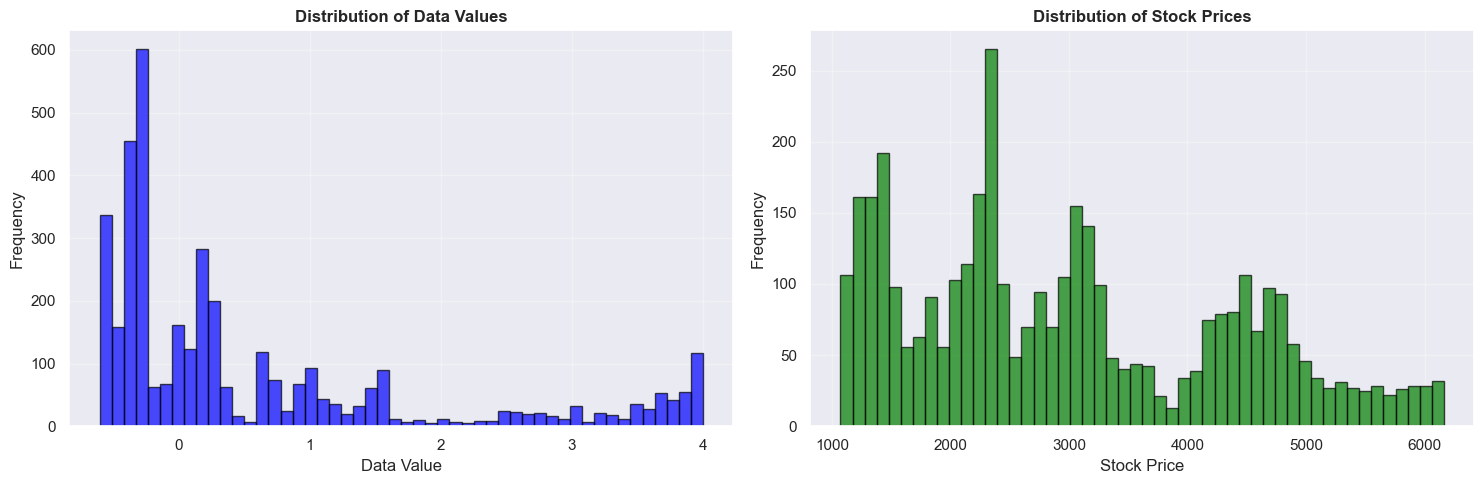

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram for Data
axes[0].hist(
    merged_df["Data"],
    bins=50,
    color="blue",
    alpha=0.7,
    edgecolor="black"
)
axes[0].set_title("Distribution of Data Values", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Data Value")
axes[0].set_ylabel("Frequency")
axes[0].grid(True, alpha=0.3)

# Histogram for Stock Price
axes[1].hist(
    merged_df["Price"],
    bins=50,
    color="green",
    alpha=0.7,
    edgecolor="black"
)
axes[1].set_title("Distribution of Stock Prices", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Stock Price")
axes[1].set_ylabel("Frequency")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Distribution Analysis

#### Distribution of Data Values

- Most **Data values are concentrated around zero and negative values**.
- The distribution is **not symmetric** and is **right-skewed**, meaning there are fewer but larger positive values.
- A small number of observations have **high positive values**, reaching close to **4**.
- This shows that extreme positive Data values are **rare**, while lower values occur more frequently.

---

#### Distribution of Stock Prices

- Stock prices are spread across a **wide range**, from about **1,000 to over 6,000**.
- The distribution shows **multiple peaks**, indicating that prices stayed around certain levels for long periods.
- Higher prices appear more frequently in later years, reflecting **long-term growth**.
- The distribution is **broader and more evenly spread** compared to the Data values.

---

#### Overall Insight

- The **Data values** are mostly clustered around lower values with occasional spikes.
- The **stock prices** show sustained growth over time with variability across different ranges.
- These different distribution shapes further suggest that the two variables behave **very differently**, supporting the idea that their relationship is **not directly proportional**.


## 7. Feature Engineering - Changes

In [32]:
# Day-over-day changes (difference)
merged_df["Data_Change"] = merged_df["Data"].diff()
merged_df["Price_Change"] = merged_df["Price"].diff()

# Day-over-day % changes
merged_df["Data_Pct_Change"] = merged_df["Data"].pct_change() * 100
merged_df["Price_Pct_Change"] = merged_df["Price"].pct_change() * 100

# The first row becomes NaN due to diff/pct_change -> remove it
merged_df = merged_df.dropna().reset_index(drop=True)

print("✅ Features created:")
print(["Data_Change", "Data_Pct_Change", "Price_Change", "Price_Pct_Change"])

print("\nColumns now:")
print(merged_df.columns.tolist())

print(f"\nDataset shape after feature engineering: {merged_df.shape}")
display(merged_df.head(10))

✅ Features created:
['Data_Change', 'Data_Pct_Change', 'Price_Change', 'Price_Pct_Change']

Columns now:
['Date', 'Data', 'Price', 'Data_Change', 'Price_Change', 'Data_Pct_Change', 'Price_Pct_Change']

Dataset shape after feature engineering: (3801, 7)


,Date,Data,Price,Data_Change,Price_Change,Data_Pct_Change,Price_Pct_Change
0,2010-01-05,0.699,1181.50,-0.001,3.50,-0.142857,0.297114
1,2010-01-06,0.694,1182.25,-0.005,0.75,-0.715308,0.063479
2,2010-01-07,0.692,1186.75,-0.002,4.50,-0.288184,0.380630
3,2010-01-08,0.691,1190.75,-0.001,4.00,-0.144509,0.337055
4,2010-01-11,0.689,1191.75,-0.002,1.00,-0.289436,0.083981
5,2010-01-12,0.685,1183.25,-0.004,-8.50,-0.580552,-0.713237
6,2010-01-13,0.684,1190.75,-0.001,7.50,-0.145985,0.633847
7,2010-01-14,0.682,1194.50,-0.002,3.75,-0.292398,0.314928
8,2010-01-15,0.680,1181.50,-0.002,-13.00,-0.293255,-1.088321
9,2010-01-19,0.675,1195.00,-0.005,13.50,-0.735294,1.142615


### New Features Created

The following **new columns** were created to better understand how values change over time:

- **Data_Change**:  
  The **day-to-day difference** in the Data value.

- **Data_Pct_Change**:  
  The **percentage change** in Data compared to the previous day.

- **Price_Change**:  
  The **day-to-day difference** in the stock price.

- **Price_Pct_Change**:  
  The **percentage change** in the stock price compared to the previous day.

---

### What This Tells Us

- These new features help capture **short-term movements** instead of just raw values.
- Percentage changes make it easier to **compare movements** between Data and Price, even though they are on different scales.
- This prepares the dataset for **deeper analysis**, such as correlation, trend comparison, or predictive modeling.


## 8. Correlation Analysis

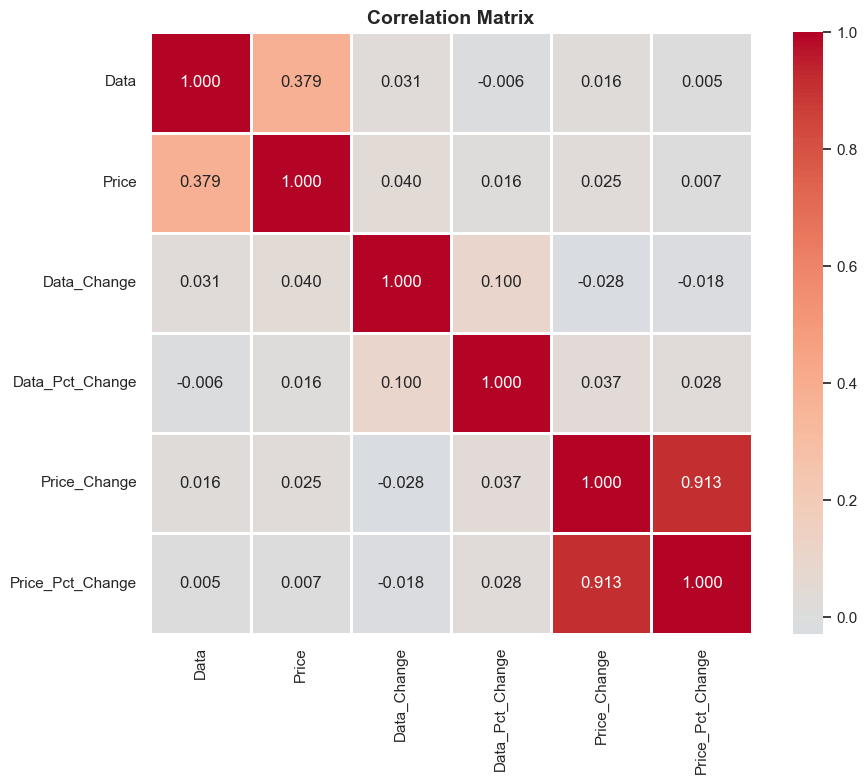


Correlation with Stock Price (Price):
Price               1.000000
Data                0.378515
Data_Change         0.040438
Price_Change        0.025106
Data_Pct_Change     0.015925
Price_Pct_Change    0.007080
Name: Price, dtype: float64


In [33]:
# Correlation matrix on key numeric features
correlation_cols = [
    "Data", "Price",
    "Data_Change", "Data_Pct_Change",
    "Price_Change", "Price_Pct_Change"
]

corr_matrix = merged_df[correlation_cols].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".3f",
    square=True,
    linewidths=1
)
plt.title("Correlation Matrix", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

# Identify which features correlate most with Price
print("\nCorrelation with Stock Price (Price):")
print(corr_matrix["Price"].sort_values(ascending=False))

### Final Insight

- The **level of Data** is related to the **long-term level of stock price**.
- However, **short-term changes in Data do not explain short-term price movements**.
- This supports earlier observations:
  - Any relationship is **long-term and indirect**.
  - Stock prices are influenced by **many other factors beyond Data alone**.

## 9. Relationship Analysis

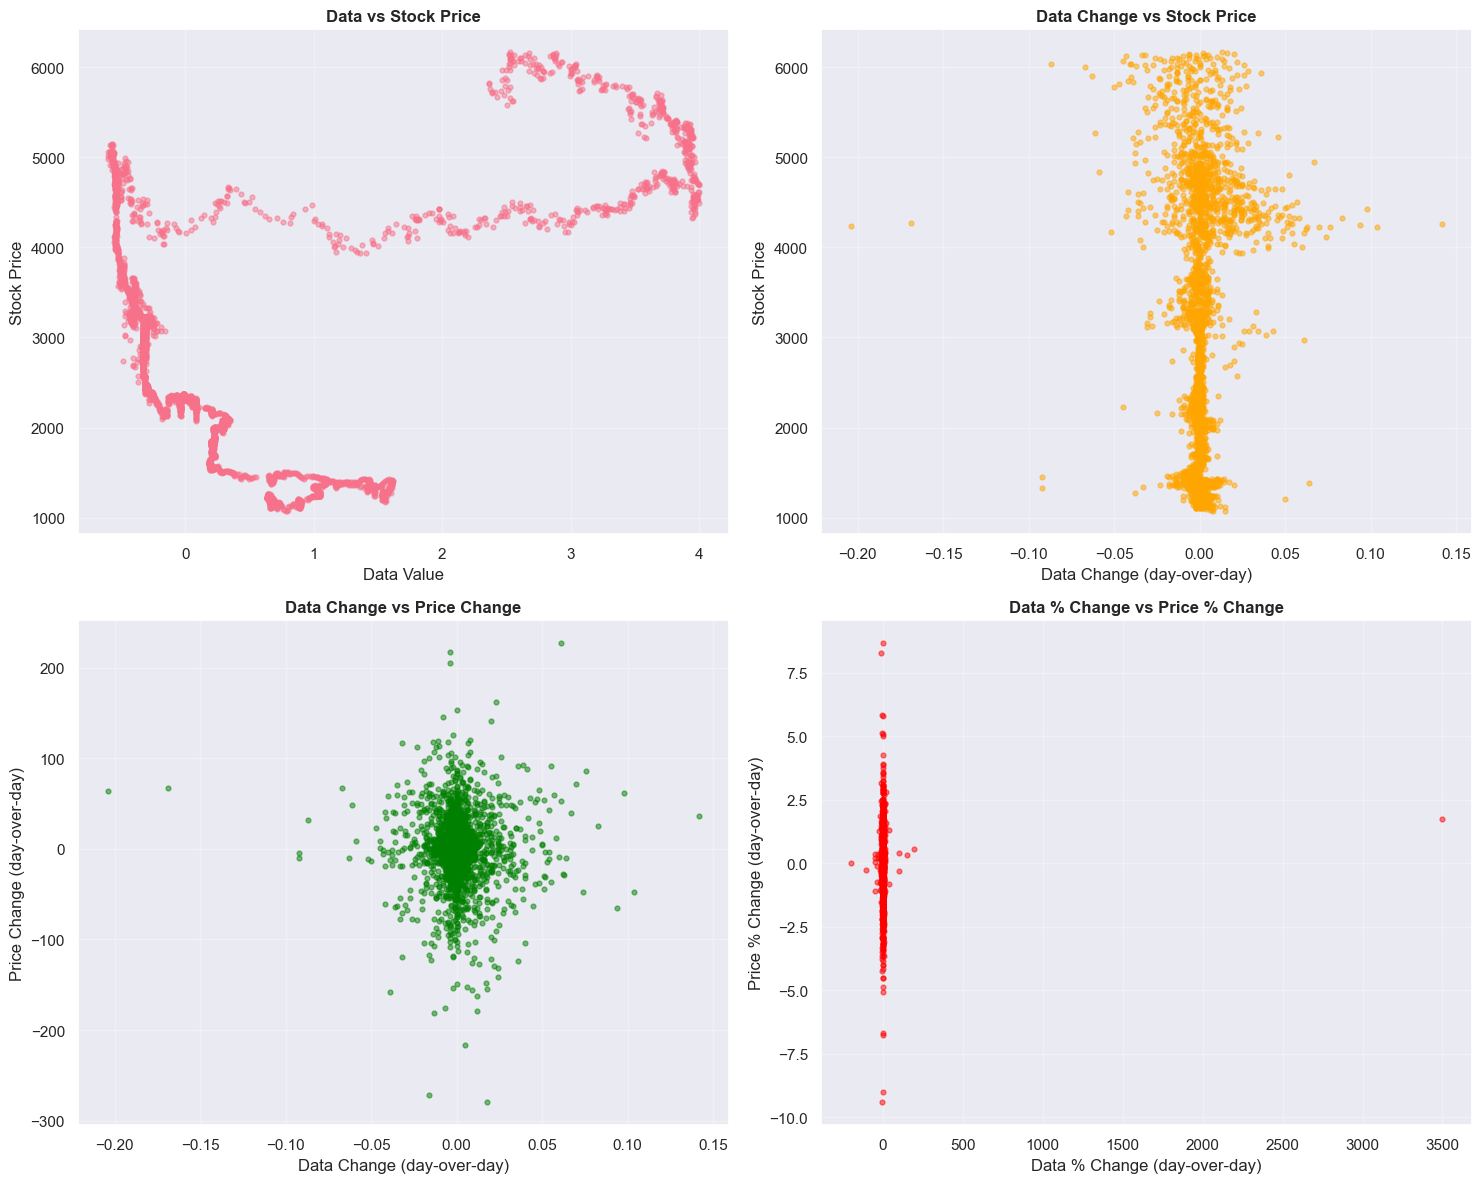

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1) Data vs Price
axes[0, 0].scatter(merged_df["Data"], merged_df["Price"], alpha=0.5, s=12)
axes[0, 0].set_title("Data vs Stock Price", fontweight="bold")
axes[0, 0].set_xlabel("Data Value")
axes[0, 0].set_ylabel("Stock Price")
axes[0, 0].grid(True, alpha=0.3)

# 2) Data Change vs Price
axes[0, 1].scatter(merged_df["Data_Change"], merged_df["Price"], alpha=0.5, s=12, color="orange")
axes[0, 1].set_title("Data Change vs Stock Price", fontweight="bold")
axes[0, 1].set_xlabel("Data Change (day-over-day)")
axes[0, 1].set_ylabel("Stock Price")
axes[0, 1].grid(True, alpha=0.3)

# 3) Data Change vs Price Change
axes[1, 0].scatter(merged_df["Data_Change"], merged_df["Price_Change"], alpha=0.5, s=12, color="green")
axes[1, 0].set_title("Data Change vs Price Change", fontweight="bold")
axes[1, 0].set_xlabel("Data Change (day-over-day)")
axes[1, 0].set_ylabel("Price Change (day-over-day)")
axes[1, 0].grid(True, alpha=0.3)

# 4) Data % Change vs Price % Change
axes[1, 1].scatter(
    merged_df["Data_Pct_Change"], merged_df["Price_Pct_Change"],
    alpha=0.5, s=12, color="red"
)
axes[1, 1].set_title("Data % Change vs Price % Change", fontweight="bold")
axes[1, 1].set_xlabel("Data % Change (day-over-day)")
axes[1, 1].set_ylabel("Price % Change (day-over-day)")
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 📊 Exploratory Data Analysis – Key Insights

#### 1. Inverse Relationship: Data vs Stock Price
**(Top Left Plot)**

- Clear **negative relationship** between Data and Stock Price.

**Insight:**  
Data behaves as an **inverse indicator** of stock performance. Lower Data values correspond to **premium stock prices**, suggesting Data may reflect **risk, negative sentiment, or distance from targets**.

---

#### 2. No Direct Link: Data Change vs Stock Price
**(Top Right Plot)**

- Heavy scatter with **no clear pattern**.
- Stock Price spans **1000–6000** regardless of daily Data changes.
- Dense clustering around **Data Change ≈ 0**.

**Insight:**  
Daily changes in Data **do not predict stock price levels**. Price depends on **long-term Data levels**, not short-term noise.

---

#### 3. Weak Relationship: Data Change vs Price Change
**(Bottom Left Plot)**

- Scatter centered around **(0, 0)** with no direction.
- Near-zero correlation (≈ -0.1 to +0.1).

**Insight:**  
Daily Data changes explain **less than 5%** of daily price movement.  
Short-term price behavior is dominated by **external and random factors**.

---

#### 4. Outliers & Data Quality Issues: Data % Change vs Price % Change
**(Bottom Right Plot)**

- Most observations cluster near **(0, 0)** (<±2% daily change).
- Extreme outliers:
  - **Data % Change > 3000%**
  - **Price % Change between -10% and +8%**

---

#### ✅ Overall Conclusion

- The **core relationship is long-term and inverse** (Data vs Price).
- **Short-term changes contain little predictive power**.

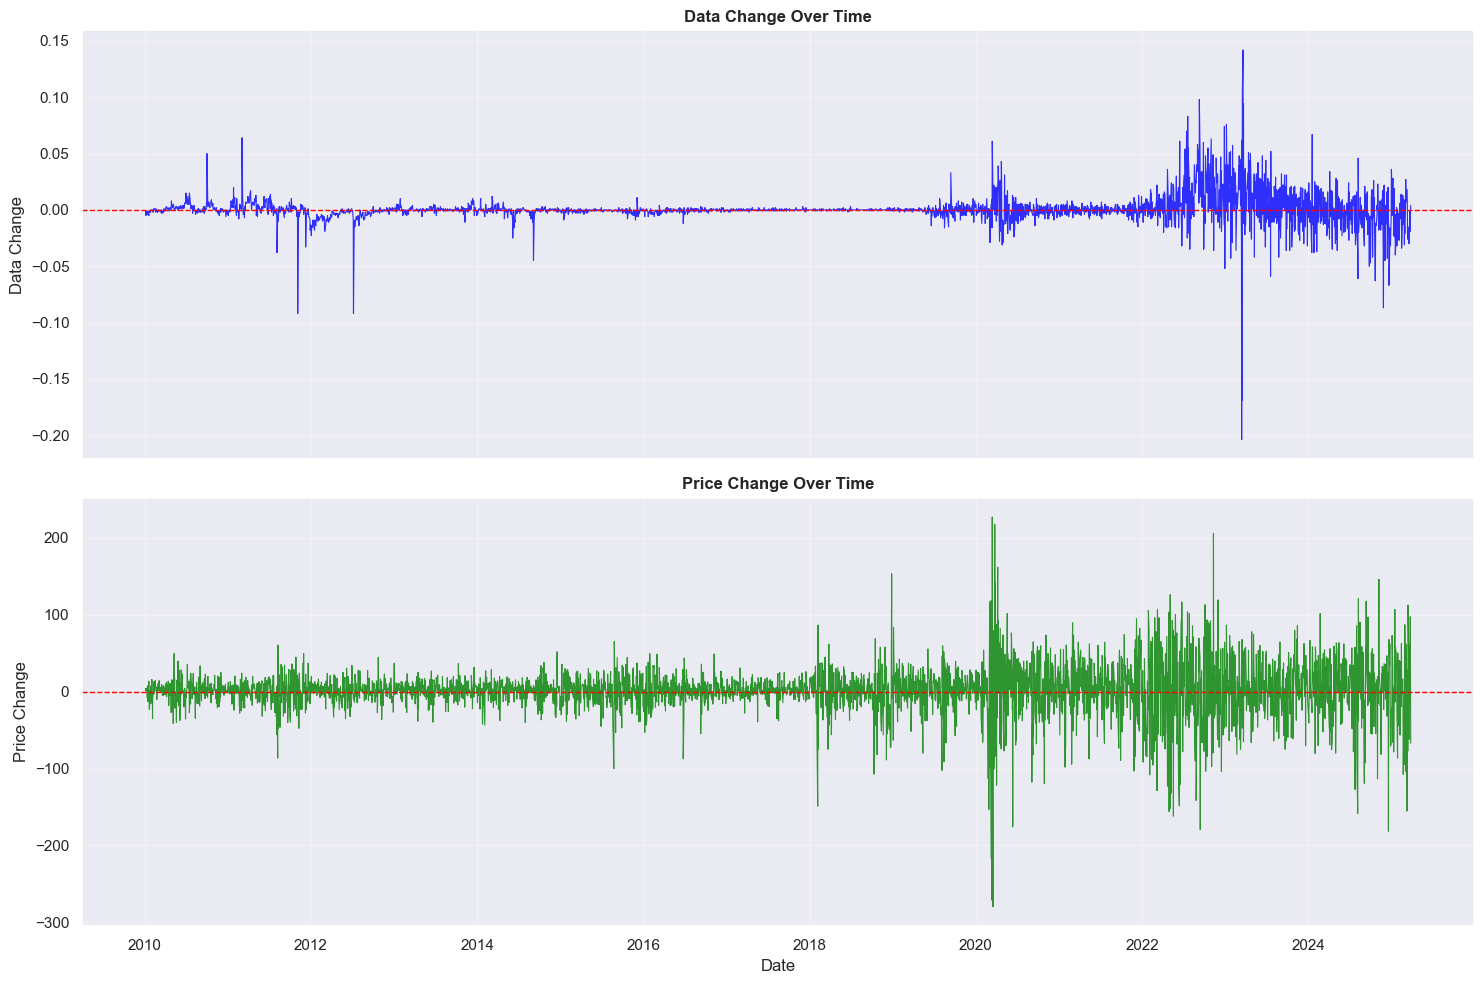

In [35]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Data change over time
axes[0].plot(merged_df["Date"], merged_df["Data_Change"], color="blue", linewidth=0.8, alpha=0.8)
axes[0].axhline(0, color="red", linestyle="--", linewidth=1)
axes[0].set_title("Data Change Over Time", fontsize=12, fontweight="bold")
axes[0].set_ylabel("Data Change")
axes[0].grid(True, alpha=0.3)

# Price change over time
axes[1].plot(merged_df["Date"], merged_df["Price_Change"], color="green", linewidth=0.8, alpha=0.8)
axes[1].axhline(0, color="red", linestyle="--", linewidth=1)
axes[1].set_title("Price Change Over Time", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Price Change")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Key Takeaway

Daily fluctuations in Data are **stable and mean-reverting**, while stock prices are **more volatile and event-driven**. Any meaningful relationship between the two emerges over **longer time horizons**, not from daily changes.

## 10. Lag Features Analysis

In [36]:
# --- Lag features to keep ---
for i in range(1, 8):
    merged_df[f"Data_Lag_{i}"] = merged_df["Data"].shift(i)
    merged_df[f"Data_Change_Lag_{i}"] = merged_df["Data_Change"].shift(i)

# Drop rows that became NaN because of shifting
merged_df_with_lags = merged_df.dropna().reset_index(drop=True)

print(f"Dataset shape with lag features: {merged_df_with_lags.shape}")
print("\nLag feature columns created:")
print([c for c in merged_df_with_lags.columns if "Lag_" in c])

Dataset shape with lag features: (3794, 21)

Lag feature columns created:
['Data_Lag_1', 'Data_Change_Lag_1', 'Data_Lag_2', 'Data_Change_Lag_2', 'Data_Lag_3', 'Data_Change_Lag_3', 'Data_Lag_4', 'Data_Change_Lag_4', 'Data_Lag_5', 'Data_Change_Lag_5', 'Data_Lag_6', 'Data_Change_Lag_6', 'Data_Lag_7', 'Data_Change_Lag_7']


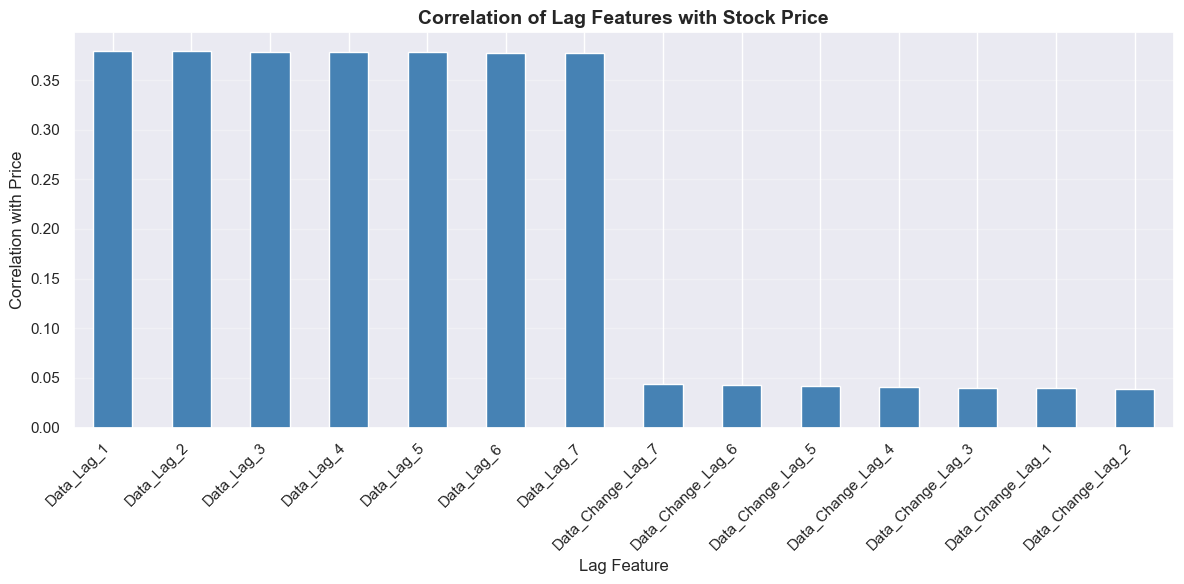

Top 10 lag features correlated with Price:
Data_Lag_1           0.379080
Data_Lag_2           0.378800
Data_Lag_3           0.378527
Data_Lag_4           0.378248
Data_Lag_5           0.377961
Data_Lag_6           0.377668
Data_Lag_7           0.377367
Data_Change_Lag_7    0.044260
Data_Change_Lag_6    0.042795
Data_Change_Lag_5    0.041880
Name: Price, dtype: float64


In [37]:
# Correlation of lag features with Price
lag_cols = [col for col in merged_df_with_lags.columns if "Lag_" in col]
lag_corr = merged_df_with_lags[lag_cols + ["Price"]].corr()["Price"].drop("Price")

# Bar chart: lag importance (by correlation magnitude)
plt.figure(figsize=(12, 6))
lag_corr.sort_values(ascending=False).plot(kind="bar", color="steelblue")
plt.title("Correlation of Lag Features with Stock Price", fontsize=14, fontweight="bold")
plt.xlabel("Lag Feature")
plt.ylabel("Correlation with Price")
plt.xticks(rotation=45, ha="right")
plt.grid(True, alpha=0.3, axis="y")
plt.tight_layout()
plt.show()

print("Top 10 lag features correlated with Price:")
print(lag_corr.sort_values(ascending=False).head(10))

### Lag Feature Correlation Analysis (Simple Explanation)

#### Data Lag vs Stock Price

- Lagged **Data values (Data_Lag_1 to Data_Lag_7)** show a **consistent moderate correlation (~0.37–0.38)** with stock price.
- The correlation strength remains **stable across all lags**, indicating persistence.
- This suggests that **past levels of Data are informative** about current stock price levels.

**Interpretation:**  
Stock prices respond to the **accumulated or historical level of Data**, not just the most recent value.

---

#### Data Change Lag vs Stock Price

- Lagged **Data_Change features** show **very weak correlations (~0.03–0.05)**.
- The correlation does **not improve with additional lags**.
- This confirms that **short-term changes in Data have little predictive power** for stock prices.

---

#### Key Takeaways

- ✅ **Level-based features (Data lags)** are meaningful predictors.
- ❌ **Change-based features (Data_Change lags)** add minimal value.
- The market appears to **price in Data slowly over time**, rather than reacting to daily fluctuations.

In [38]:
# Add days_gap to capture weekends/holidays (critical for stock forecasting)
merged_df['days_gap'] = merged_df['Date'].diff().dt.days

# Fill first row (NaN) with 1 (assume normal trading day)
merged_df['days_gap'] = merged_df['days_gap'].fillna(1)

print("✅ Added 'days_gap' feature")
print("\nDays gap distribution:")
print(merged_df['days_gap'].value_counts().sort_index())

print(f"\n1-day gaps (normal trading): {(merged_df['days_gap']==1).sum()/len(merged_df)*100:.1f}%")
print(f"3-day gaps (weekends): {(merged_df['days_gap']==3).sum()/len(merged_df)*100:.1f}%")
print(f"4+ day gaps (holidays): {(merged_df['days_gap']>=4).sum()/len(merged_df)*100:.1f}%")

display(merged_df[['Date', 'days_gap', 'Data', 'Price']].head(10))

✅ Added 'days_gap' feature

Days gap distribution:
days_gap
1.0    2967
2.0      35
3.0     691
4.0      90
5.0      18
Name: count, dtype: int64

1-day gaps (normal trading): 78.1%
3-day gaps (weekends): 18.2%
4+ day gaps (holidays): 2.8%


,Date,days_gap,Data,Price
0,2010-01-05,1.0,0.699,1181.50
1,2010-01-06,1.0,0.694,1182.25
2,2010-01-07,1.0,0.692,1186.75
3,2010-01-08,1.0,0.691,1190.75
4,2010-01-11,3.0,0.689,1191.75
5,2010-01-12,1.0,0.685,1183.25
6,2010-01-13,1.0,0.684,1190.75
7,2010-01-14,1.0,0.682,1194.50
8,2010-01-15,1.0,0.680,1181.50
9,2010-01-19,4.0,0.675,1195.00


## 11. Rolling Statistics

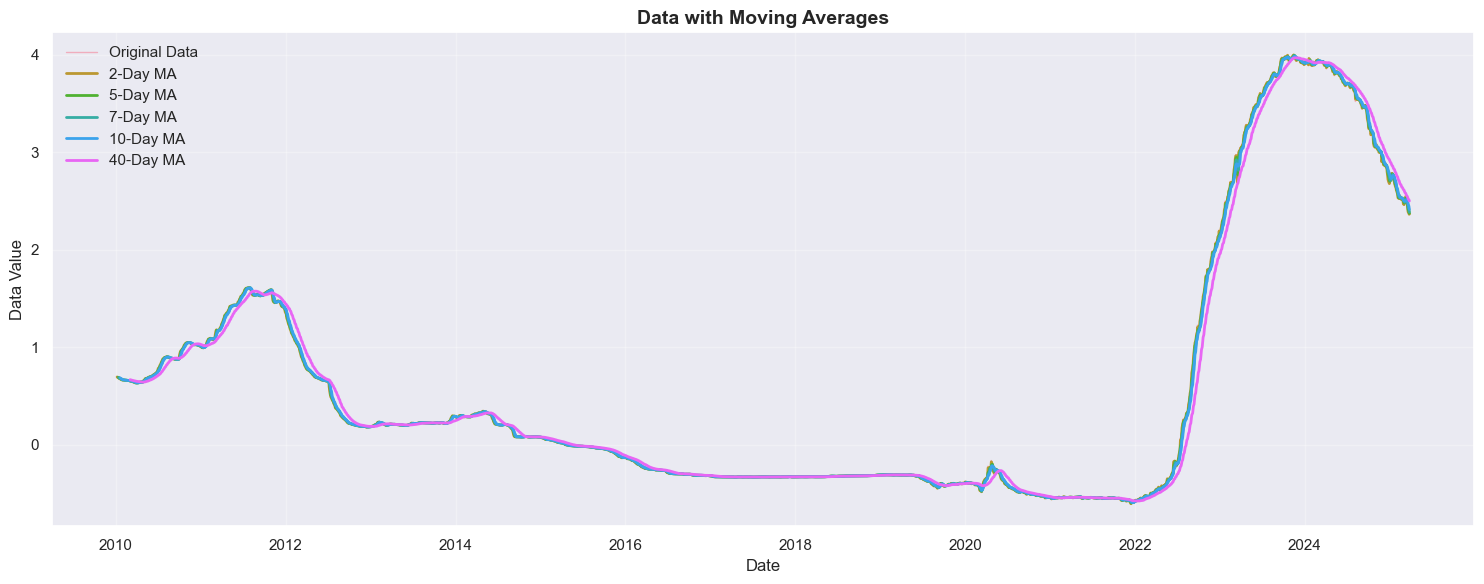

Rolling feature columns created: ['Data_MA_2', 'Data_MA_5', 'Data_MA_7', 'Data_MA_10', 'Data_MA_40']


,Date,Data,Data_MA_2,Data_MA_5,Data_MA_7,Data_MA_10,Data_MA_40
0,2010-01-05,0.699,NaN,NaN,NaN,NaN,NaN
1,2010-01-06,0.694,0.6965,NaN,NaN,NaN,NaN
2,2010-01-07,0.692,0.6930,NaN,NaN,NaN,NaN
3,2010-01-08,0.691,0.6915,NaN,NaN,NaN,NaN
4,2010-01-11,0.689,0.6900,0.6930,NaN,NaN,NaN
5,2010-01-12,0.685,0.6870,0.6902,NaN,NaN,NaN
6,2010-01-13,0.684,0.6845,0.6882,0.690571,NaN,NaN
7,2010-01-14,0.682,0.6830,0.6862,0.688143,NaN,NaN
8,2010-01-15,0.680,0.6810,0.6840,0.686143,NaN,NaN
9,2010-01-19,0.675,0.6775,0.6812,0.683714,0.6871,NaN


In [39]:
# --- Rolling statistics (recommended set) ---

# Moving averages on price level
merged_df["Data_MA_2"] = merged_df["Data"].rolling(window=2).mean()
merged_df["Data_MA_5"] = merged_df["Data"].rolling(window=5).mean()
merged_df["Data_MA_7"] = merged_df["Data"].rolling(window=7).mean()
merged_df["Data_MA_10"] = merged_df["Data"].rolling(window=10).mean()
merged_df["Data_MA_40"] = merged_df["Data"].rolling(window=40).mean()


# --- Visualization (price + MAs only) ---
plt.figure(figsize=(15, 6))
plt.plot(merged_df["Date"], merged_df["Data"],
         label="Original Data", alpha=0.5, linewidth=1)
plt.plot(merged_df["Date"], merged_df["Data_MA_2"],
         label="2-Day MA", linewidth=2)
plt.plot(merged_df["Date"], merged_df["Data_MA_5"],
         label="5-Day MA", linewidth=2)
plt.plot(merged_df["Date"], merged_df["Data_MA_7"],
         label="7-Day MA", linewidth=2)
plt.plot(merged_df["Date"], merged_df["Data_MA_10"],
         label="10-Day MA", linewidth=2)
plt.plot(merged_df["Date"], merged_df["Data_MA_40"],
         label="40-Day MA", linewidth=2)

plt.title("Data with Moving Averages", fontsize=14, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Data Value")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- Sanity check ---
rolling_cols = ["Data_MA_2", "Data_MA_5", "Data_MA_7", "Data_MA_10", "Data_MA_40"]
print("Rolling feature columns created:", rolling_cols)

display(
    merged_df[["Date", "Data"] + rolling_cols].head(12)
)

#### Data with Moving Averages – Short Insights

- All moving averages closely **track the original Data**, confirming a strong underlying trend.
- **Short-term MAs (2–5 days)** respond quickly to small fluctuations and capture short-term noise.
- **Medium-term MAs (7–10 days)** smooth volatility while still reacting reasonably fast to trend changes.
- The **40-day MA** is the smoothest and best highlights **long-term trends**, but reacts with delay.
- A **clear structural shift** occurs around **2022**, where all MAs rise sharply, confirming a strong regime change.
- Post-peak (2024 onward), moving averages slope downward, signaling a **trend reversal**.

**Key Takeaway:**  
Moving averages effectively filter noise and reveal that **Data trends are persistent and regime-based**, making longer-window averages more useful for strategic analysis than short-term signals.

## 12. Key Insights and Observations

In [40]:
print("=== KEY EXPLORATION INSIGHTS ===")

print("\n1) Dataset Overview")
print(f"   - Merged rows (Date overlap): {len(merged_df)}")
print(f"   - Date range: {merged_df['Date'].min()} to {merged_df['Date'].max()}")
print(f"   - Columns: {merged_df.columns.tolist()}")

print("\n2) Basic Ranges")
print(f"   - Data range: {merged_df['Data'].min():.3f} to {merged_df['Data'].max():.3f}")
print(f"   - Price range: {merged_df['Price'].min():.2f} to {merged_df['Price'].max():.2f}")

print("\n3) Correlation Summary (target = Price_Pct_Change)")

correlation_cols = [
    "Price_Pct_Change",
    "Data",
    "Data_Change",
    "Data_Pct_Change",
    "Data_Lag_2",
    "Data_Lag_5",
    "Data_MA_2",
    "Data_MA_5",
    "Data_MA_10",
    "Data_MA_40"
]

corr_matrix = merged_df[correlation_cols].corr()

print(
    corr_matrix["Price_Pct_Change"]
    .sort_values(ascending=False)
    .round(3)
)

print("\n4) What this suggests")
print("   - Price levels show weak predictive linear relationships.")
print("   - Lagged Data and short-term rolling features matter more.")
print("   - Low correlations justify tree-based, non-linear models.")


=== KEY EXPLORATION INSIGHTS ===

1) Dataset Overview
   - Merged rows (Date overlap): 3801
   - Date range: 2010-01-05 00:00:00 to 2025-03-26 00:00:00
   - Columns: ['Date', 'Data', 'Price', 'Data_Change', 'Price_Change', 'Data_Pct_Change', 'Price_Pct_Change', 'Data_Lag_1', 'Data_Change_Lag_1', 'Data_Lag_2', 'Data_Change_Lag_2', 'Data_Lag_3', 'Data_Change_Lag_3', 'Data_Lag_4', 'Data_Change_Lag_4', 'Data_Lag_5', 'Data_Change_Lag_5', 'Data_Lag_6', 'Data_Change_Lag_6', 'Data_Lag_7', 'Data_Change_Lag_7', 'days_gap', 'Data_MA_2', 'Data_MA_5', 'Data_MA_7', 'Data_MA_10', 'Data_MA_40']

2) Basic Ranges
   - Data range: -0.605 to 4.002
   - Price range: 1072.50 to 6163.00

3) Correlation Summary (target = Price_Pct_Change)
Price_Pct_Change    1.000
Data_Pct_Change     0.028
Data_MA_40          0.006
Data_MA_10          0.005
Data_MA_5           0.005
Data_Lag_5          0.005
Data_Lag_2          0.005
Data_MA_2           0.005
Data                0.005
Data_Change        -0.018
Name: Price_Pct

## 13. Save Processed Data

In [41]:
# %% [markdown]
## 13. Save Processed Data for Modeling

# --- Core columns ---
essential_cols = ["Date", "Data", "Price"]

# --- Change / return columns (targets or auxiliary analysis) ---
change_cols = [
    "Data_Change",
    "Data_Pct_Change",
    "Price_Change",
    "Price_Pct_Change",
]

# --- Trading gap feature ---
trading_day_col = ["days_gap"]

# --- Explicit lag selection (NO wildcards) ---
lag_cols = [
    "Data_Lag_1",
    "Data_Lag_2",
    "Data_Lag_3",
    "Data_Lag_4",
    "Data_Lag_5",
    "Data_Lag_6",
    "Data_Lag_7",
    "Data_Change_Lag_1",
    "Data_Change_Lag_2",
    "Data_Change_Lag_3",
    "Data_Change_Lag_4",
    "Data_Change_Lag_5",
    "Data_Change_Lag_6",
    "Data_Change_Lag_7",
]

# --- Explicit rolling features (aligned with model design) ---
rolling_cols = [
    "Data_MA_2",
    "Data_MA_5",
    "Data_MA_7",
    "Data_MA_10",
    "Data_MA_40"
]

# --- Combine ---
keep_cols = (
    essential_cols
    + trading_day_col
    + change_cols
    + lag_cols
    + rolling_cols
)

print("Columns to save in merged_data.csv:")
print(keep_cols)
print(f"\nTotal columns: {len(keep_cols)}")

# --- Select and clean ---
merged_df_clean = merged_df[keep_cols].dropna().reset_index(drop=True)

print(f"\nFinal dataset shape: {merged_df_clean.shape}")
print(
    f"Rows after dropna: {len(merged_df_clean)} "
    f"(dropped {len(merged_df) - len(merged_df_clean)} NaN rows)"
)

# --- Save ---
output_path = "../data/merged_data.csv"
merged_df_clean.to_csv(output_path, index=False)

print(f"\n✅ Saved: {output_path}")
display(merged_df_clean.head(10))

# --- Verification ---
print("\n=== Verification ===")
print(f"Date range: {merged_df_clean['Date'].min()} → {merged_df_clean['Date'].max()}")
print(f"Data range: {merged_df_clean['Data'].min():.3f} → {merged_df_clean['Data'].max():.3f}")
print(f"Price range: {merged_df_clean['Price'].min():.2f} → {merged_df_clean['Price'].max():.2f}")
print(f"'Price' included: {'Price' in merged_df_clean.columns} ✅")
print(f"'days_gap' included: {'days_gap' in merged_df_clean.columns} ✅")

Columns to save in merged_data.csv:
['Date', 'Data', 'Price', 'days_gap', 'Data_Change', 'Data_Pct_Change', 'Price_Change', 'Price_Pct_Change', 'Data_Lag_1', 'Data_Lag_2', 'Data_Lag_3', 'Data_Lag_4', 'Data_Lag_5', 'Data_Lag_6', 'Data_Lag_7', 'Data_Change_Lag_1', 'Data_Change_Lag_2', 'Data_Change_Lag_3', 'Data_Change_Lag_4', 'Data_Change_Lag_5', 'Data_Change_Lag_6', 'Data_Change_Lag_7', 'Data_MA_2', 'Data_MA_5', 'Data_MA_7', 'Data_MA_10', 'Data_MA_40']

Total columns: 27

Final dataset shape: (3762, 27)
Rows after dropna: 3762 (dropped 39 NaN rows)

✅ Saved: ../data/merged_data.csv


,Date,Data,Price,days_gap,Data_Change,Data_Pct_Change,Price_Change,Price_Pct_Change,Data_Lag_1,Data_Lag_2,...,Data_Change_Lag_3,Data_Change_Lag_4,Data_Change_Lag_5,Data_Change_Lag_6,Data_Change_Lag_7,Data_MA_2,Data_MA_5,Data_MA_7,Data_MA_10,Data_MA_40
0,2010-03-03,0.655,1167.75,1.0,0.000,0.000000,1.00,0.085708,0.655,0.655,...,-0.002,-0.001,-0.002,0.000,0.000,0.6550,0.6558,0.657000,0.6581,0.668900
1,2010-03-04,0.654,1171.50,1.0,-0.001,-0.152672,3.75,0.321130,0.655,0.655,...,-0.001,-0.002,-0.001,-0.002,0.000,0.6545,0.6550,0.656000,0.6575,0.667775
2,2010-03-05,0.653,1185.75,1.0,-0.001,-0.152905,14.25,1.216389,0.654,0.655,...,0.000,-0.001,-0.002,-0.001,-0.002,0.6535,0.6544,0.655143,0.6567,0.666750
3,2010-03-08,0.652,1186.25,3.0,-0.001,-0.153139,0.50,0.042167,0.653,0.654,...,0.000,0.000,-0.001,-0.002,-0.001,0.6525,0.6538,0.654286,0.6558,0.665750
4,2010-03-09,0.652,1189.75,1.0,0.000,0.000000,3.50,0.295047,0.652,0.653,...,-0.001,0.000,0.000,-0.001,-0.002,0.6520,0.6532,0.653714,0.6549,0.664775
5,2010-03-10,0.651,1195.00,1.0,-0.001,-0.153374,5.25,0.441269,0.652,0.652,...,-0.001,-0.001,0.000,0.000,-0.001,0.6515,0.6524,0.653143,0.6541,0.663825
6,2010-03-11,0.650,1199.75,1.0,-0.001,-0.153610,4.75,0.397490,0.651,0.652,...,-0.001,-0.001,-0.001,0.000,0.000,0.6505,0.6516,0.652429,0.6533,0.662950
7,2010-03-12,0.649,1200.50,1.0,-0.001,-0.153846,0.75,0.062513,0.650,0.651,...,0.000,-0.001,-0.001,-0.001,0.000,0.6495,0.6508,0.651571,0.6526,0.662075
8,2010-03-15,0.646,1199.50,3.0,-0.003,-0.462250,-1.00,-0.083299,0.649,0.650,...,-0.001,0.000,-0.001,-0.001,-0.001,0.6475,0.6496,0.650429,0.6517,0.661175
9,2010-03-16,0.646,1208.75,1.0,0.000,0.000000,9.25,0.771155,0.646,0.649,...,-0.001,-0.001,0.000,-0.001,-0.001,0.6460,0.6484,0.649429,0.6508,0.660325



=== Verification ===
Date range: 2010-03-03 00:00:00 → 2025-03-26 00:00:00
Data range: -0.605 → 4.002
Price range: 1072.50 → 6163.00
'Price' included: True ✅
'days_gap' included: True ✅
